<a href="https://colab.research.google.com/github/Sabrina112358/CAP-419/blob/main/DataAugmentation_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BIBLIOTECAS:**


In [ ]:
import numpy as np
from random import randint
from matplotlib import pyplot as plt, image as mpimg
from scipy.ndimage import gaussian_filter
from skimage.transform import resize

**PRINCIPAIS TÉCNICAS:**

In [ ]:
# Rotação:
def rotate(img, degrees):
    return (np.rot90(img, k=int(degrees / 90)))

# Espelhamento:
def flip(img, direction):
    if (direction == "vertical"):
        return (img[::-1, ::])
    elif (direction == "horizontal"):
        return (img[::, ::-1])
    elif (direction == "both"):
        return (img[::-1, ::-1])

# Aparagem:
def trim(img, top=0, bottom=0, left=0, right=0):
    return (img[top:-bottom, right:-left])

# Recorte:
def crop(img, right=0, top=0, left=100, bottom=100):
    return (img[top:bottom, right:left])

# Gaussian blur:
def blur(img, sigma=1):
    return(gaussian_filter(img, sigma=sigma))

# Redimensionamento:
def rescale(img, ratio):
    return (resize(img, (int(img.shape[1] * ratio), int(img.shape[0] * ratio))))

**ROTINA DE DATA AUGMENTATION:**

In [ ]:
# Rotina de data augmentation:
def augmentate(img, chunks=100, invert=3, rotations=3, blur_sigmas=5):
    res = []
    areas = []

    while (len(areas) != chunks):
        x = randint(0, img.shape[1] - 100)
        y = randint(0, img.shape[0] - 100)
        if ((x, y) not in areas):
            areas.append((x, y))

    for coords in areas:
        nimg = crop(img, coords[0], coords[1], coords[0] + 100, coords[1] + 100)

        for x in [nimg, flip(nimg, "vertical"), flip(nimg, "horizontal"), flip(nimg, "both")][:invert + 1]:
            for y in [0, 90, 180, 270][:rotations + 1]:
                res.append(rotate(x, y))
                for s in range(1, blur_sigmas + 1):
                    res.append(rotate(blur(x, sigma=s), y))

    return (res)

**FUNÇÕES EXTRAS (OPENCV):**

In [ ]:
import cv2

# Binarização:
def binary(img, threshold=120, inv=False, bw=True):
    if (inv == False):
        method = cv2.THRESH_BINARY
    else:
        method = cv2.THRESH_BINARY_INV

    if (bw == True):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    return(cv2.threshold(img, threshold, 255, method)[1])

# Truncagem:
def trunc(img, threshold=120, max=255):
    return (cv2.threshold(img, threshold, max, cv2.THRESH_TRUNC)[1])

# Extração e realce de bordas:
def edgy(img, threshold=120, max=255, aperture=3, mask=True):
    edges = cv2.Canny(img, threshold, max, aperture)

    if (mask == True):
        return (cv2.bitwise_and(img, img, mask=cv2.bitwise_not(edges)))

    return(edges)

**DOWNLOAD DA IMAGEM DE TESTE:**

In [ ]:
!wget -O CBERS.tif https://github.com/tkorting/remote-sensing-images/blob/master/CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif?raw=true

img = mpimg.imread("CBERS.tif")
plt.imshow(img)

**TESTE DAS TÉCNICAS PRINCIPAIS:**

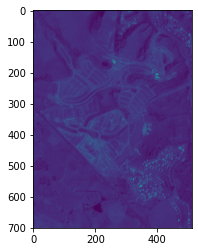

In [ ]:
plt.imshow(rotate(img, 90))

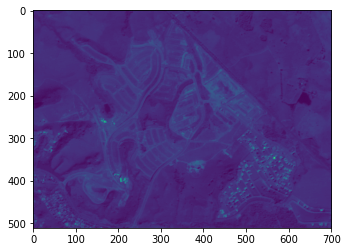

In [ ]:
plt.imshow(flip(img, "horizontal"))

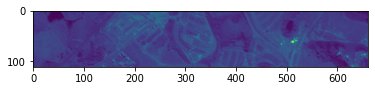

In [ ]:
plt.imshow(trim(img, 200, 200, 20, 20))

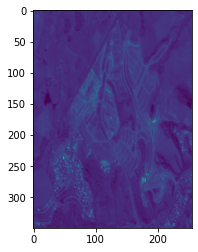

In [ ]:
plt.imshow(rescale(img, 0.5))

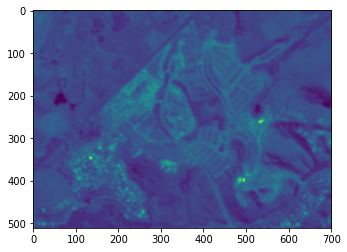

In [ ]:
plt.imshow(blur(img, sigma=2))

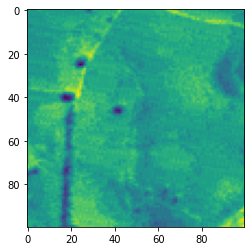

In [ ]:
plt.imshow(crop(img, 100, 100, 200, 200))

**TESTE DAS TÉCNICAS COM OPENCV:**

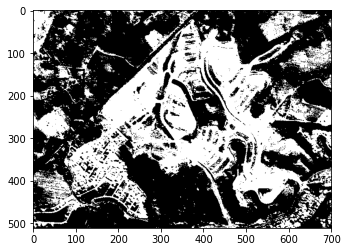

In [ ]:
plt.imshow(binary(img, bw=False, threshold=50, inv=True), cmap="binary")

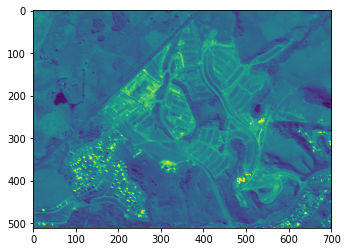

In [ ]:
plt.imshow(trunc(img, 100, 200))

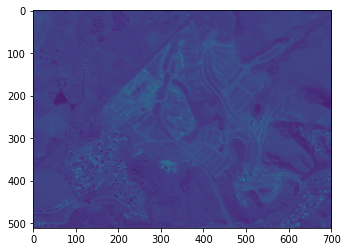

In [ ]:
plt.imshow(edgy(img))

**EXECUÇÃO DA ROTINA DE DATA AUGMENTATION:**

In [ ]:
res = augmentate(img)

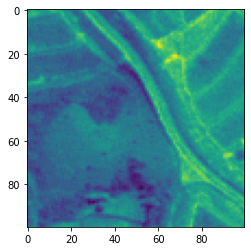

In [ ]:
plt.imshow(res[0])

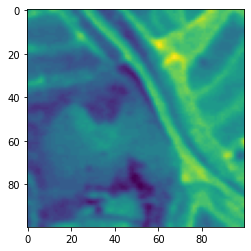

In [ ]:
plt.imshow(res[1])

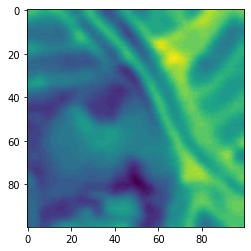

In [ ]:
plt.imshow(res[2])

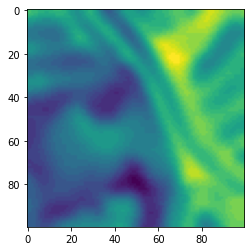

In [ ]:
plt.imshow(res[3])

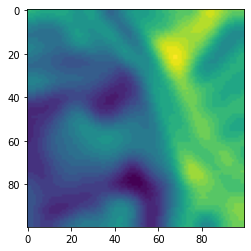

In [ ]:
plt.imshow(res[4])

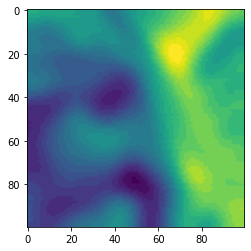

In [ ]:
plt.imshow(res[5])

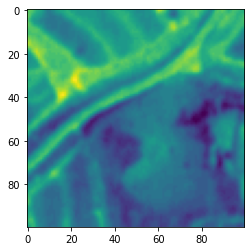

In [ ]:
plt.imshow(res[7])

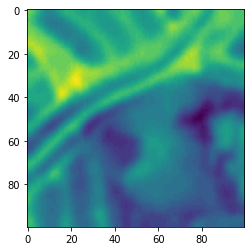

In [ ]:
plt.imshow(res[8])

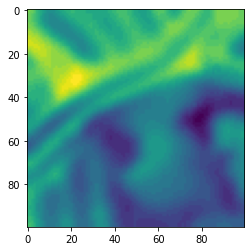

In [ ]:
plt.imshow(res[9])

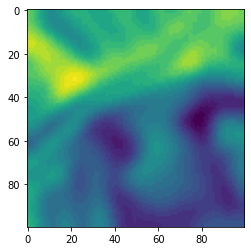

In [ ]:
plt.imshow(res[10])

# Gerando imagens para o README.md

In [ ]:
from PIL import Image
img = mpimg.imread("CBERS.tif")

## Image Original

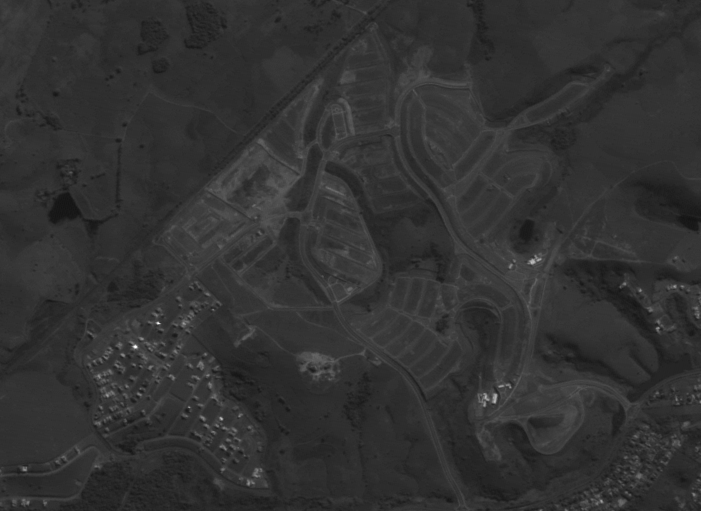

In [ ]:
Image.fromarray(img)

## Rotate

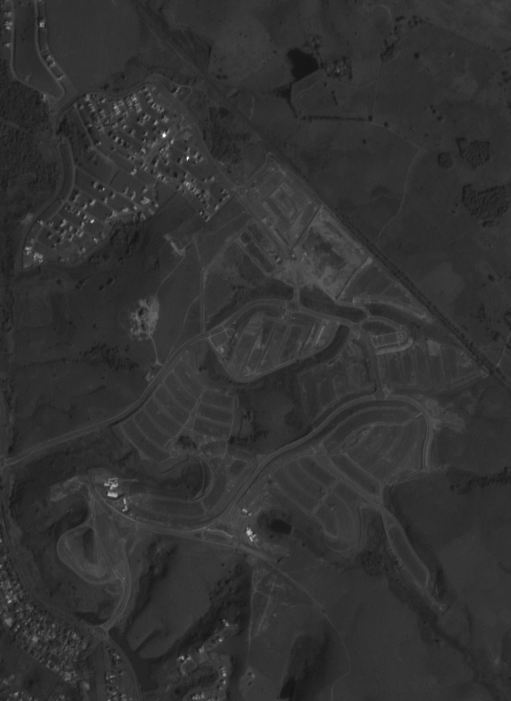

In [ ]:
Image.fromarray(rotate(img, 90))
Image.fromarray(rotate(img, 180))
Image.fromarray(rotate(img, 270))


## Flip


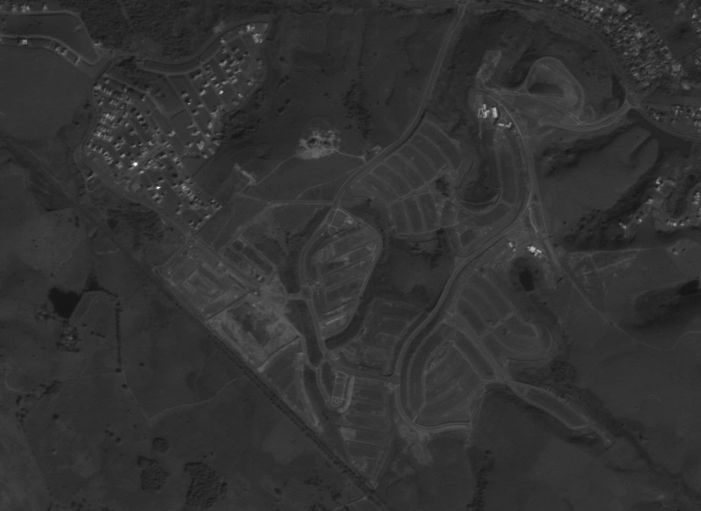

In [ ]:
Image.fromarray(flip(img, "horizontal"))
Image.fromarray(flip(img, "vertical"))


## Reshape

In [ ]:

# img = "/content/buffer_0_original.jpg"
# img = readGdal(img)

Image.fromarray(crop(img, 100, 100, 200, 200))
# Image.fromarray((rescale(img, 0.5) * 255).astype("uint8"))
# Image.fromarray(trim(img, 50, 50, 20, 20))
# Image.fromarray(trunc(img, 100, 200))



## Color

In [ ]:
Image.fromarray(binary(img, bw=False, threshold=50, inv=True))

## Remote Sensing

In [ ]:
from PIL import Image
from osgeo import gdal
import numpy as np

def cloud(img):
    img1 = Image.fromarray(img)
    png_path = "/content/cloud_template.png"
    img2 = Image.open(png_path)
    size = img1.size
    img2 = img2.resize(size,Image.ANTIALIAS)
    img1 = np.asarray(img1)
    img2 = np.asarray(img2)
    cloud_mask = img2[:,:,0]
    res = np.where(cloud_mask == 0, img1, cloud_mask)
    return res

def readGdal(src):
  ds = gdal.Open(src)
  band = ds.GetRasterBand(0)
  bandarr = band.ReadAsArray()

  return bandarr

In [ ]:
#amostra
# img = "/content/buffer_0_original.jpg"
# img = readGdal(img)

# cloud
Image.fromarray(cloud(img))

# degradation
gdal.Warp('out.tif', 'CBERS.tif', xRes=100, yRes=100)
Image.fromarray(readGdal("out.tif"))

# haze
Image.fromarray(blur(img, sigma=2))

# Sharpen Edgy
Image.fromarray(edgy(img))
